In [1]:
import torch
import torchvision

import torchvision.transforms as transforms

In [2]:
import torch
from torch.distributions.normal import Normal

from torch.distributions.multivariate_normal import MultivariateNormal

In [3]:
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
length = 10

In [4]:
torch.exp(Normal(0,1).log_prob(torch.tensor(0)))


tensor(0.3989)

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Initial State
        self.s_0 = nn.Parameter(torch.tensor([5.525, 5.1, 5.1,5.1], requires_grad=True)).requires_grad_(True)
        
        self.T = nn.Parameter(torch.tensor(torch.rand(4,4), requires_grad=True)).requires_grad_(True)
        

        self.emission1=nn.Sequential(nn.Linear(16, 8),
                                    
                                    nn.ReLU(),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(8, 16),
                                     nn.Tanh(),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(16, length))
        self.emission2=nn.Sequential(nn.Linear(16, 8),
                                    
                                    nn.ReLU(),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(8, 16),
                                     nn.Tanh(),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(16, length))
        self.emission3=nn.Sequential(nn.Linear(2, 8),
                                   nn.LeakyReLU(0.2),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(8, 16),
                                    nn.LeakyReLU(0.2))
        self.emission4=nn.Sequential(nn.Linear(2, 8),
                                   nn.LeakyReLU(0.2),
#                                      nn.Dropout(p=0.2),
                                    nn.Linear(8, 16),
                                    nn.LeakyReLU(0.2))
        
        

    def forward(self, x,t,pred):

        x = F.softmax((x.clone()),dim=0)
        l=0.0

        x_temp=x.clone()
            
            
            
            
        o_1= self.emission((torch.tensor([1.0,0.0]).to(device)))
        dist=MultivariateNormal(o_1[0],o_1[1]*torch.eye(length).to(device))
        
        o_1 = torch.exp(dist.log_prob(pred[0]))
#         o_1=self.product_N(o_1[0],o_1[1],pred[0])
        x_temp[0]=o_1*x[0].clone()

        o_1= self.emission((torch.tensor([2.0,0.0]).to(device)))
        dist=MultivariateNormal(o_1[0],o_1[1]*torch.eye(length).to(device))
        o_1 = torch.exp(dist.log_prob(pred[0]))
#         o_1=self.product_N(o_1[0],o_1[1],pred[0])
        x_temp[1]=o_1.clone()*x[1].clone()

        o_1= self.emission((torch.tensor([3.0,0.0]).to(device)))
        dist=MultivariateNormal(o_1[0],o_1[1]*torch.eye(length).to(device))
        o_1 = torch.exp(dist.log_prob(pred[0]))
#         o_1=self.product_N(o_1[0],o_1[1],pred[0])
        x_temp[2]=o_1*x[2].clone()
        
        o_1= self.emission((torch.tensor([4.0,0.0]).to(device)))
        dist=MultivariateNormal(o_1[0],o_1[1]*torch.eye(length).to(device))
        o_1 = torch.exp(dist.log_prob(pred[0]))
#         o_1=self.product_N(o_1[0],o_1[1],pred[0])
        x_temp[3]=o_1*x[3].clone()
        
#         print(x_temp)
        


        x_temp=x_temp.clip(1e-32,1)
        
        x=x_temp.clone()/torch.sum(x_temp.clone())
        l+=torch.log(torch.sum(x_temp.clone()))# -0.01*state
        
        for i in range(1,t): 

            
            x=torch.matmul(x,F.softmax(self.T,dim=1))
            x_temp=x.clone()
            

            x_temp1=x.clone()
            o_1= self.emission((torch.tensor([1.0,i]).to(device)))
            dist=MultivariateNormal(o_1[0],o_1[1]*torch.eye(length).to(device))
            o_1 = torch.exp(dist.log_prob(pred[i]))
#             o_1=self.product_N(o_1[0],o_1[1],pred[i])
            x_temp[0]=o_1*x[0]

            o_1=self.emission((torch.tensor([2.0,i]).to(device)))
            dist=MultivariateNormal(o_1[0],o_1[1]*torch.eye(length).to(device))
            o_1 = torch.exp(dist.log_prob(pred[i]))
#             o_1=self.product_N(o_1[0],o_1[1],pred[i])
            x_temp[1]=o_1.clone()*x[1]
 
            o_1= self.emission((torch.tensor([3.0,i]).to(device)))
            dist=MultivariateNormal(o_1[0],o_1[1]*torch.eye(length).to(device))
            o_1 = torch.exp(dist.log_prob(pred[i]))
#             o_1=self.product_N(o_1[0],o_1[1],pred[i])
            x_temp[2]=o_1*x[2]

            o_1= self.emission((torch.tensor([4.0,i]).to(device)))
            dist=MultivariateNormal(o_1[0],o_1[1]*torch.eye(length).to(device))
            o_1 = torch.exp(dist.log_prob(pred[i]))
#             o_1=self.product_N(o_1[0],o_1[1],pred[i])
            x_temp[3]=o_1*x[3].clone()
            
            
            
#             print(x_temp)
#             print(pred[i])
            x_temp=x_temp.clip(1e-32,1)

            x=x_temp.clone()/torch.sum(x_temp.clone())
#             print(x)
#             print("-----------------------------")
            l+=torch.log(torch.sum(x_temp.clone()))
        return l
    
    def transition(self,x):
        x=torch.matmul(x.to(device),F.softmax(self.T,dim=1))
        x_temp=x.clone()
        return x
    def Observation(self,x):

        o_1= self.emission((x))

        return o_1
    def emission(self,x):
        x1=self.emission3((x))
        x=self.emission3((x))
        o_1= self.emission1((x1))
        o_2= self.emission2((x))
        
        o_2=torch.exp(o_2).clip(1e-15,1e+15)

        return o_1,o_2
    
    def product_N(self,o1,o2,pred):
        p=0
        for i in range(0,length):
            p+=Normal(o1[i],o2[i]).log_prob(pred[i])
        return torch.exp(p)
    
 

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

# print(device)
device='cpu'


In [7]:


T_matrix=torch.rand(3, 3).to(device)
T_matrix=torch.tensor([[0.7000, 0.1300, 0.1000, 0.0700],
        [0.1000, 0.7300, 0.1000, 0.0700],
        [0.2020, 0.2525, 0.4747, 0.0707],
        [0.1000, 0.0700, 0.0400, 0.7900]], device=device)

# T_matrix[1,1]=8

# T_matrix[2,2]=8

# T_matrix[0,0]=8

T_matrix=T_matrix/torch.sum(T_matrix, 1).reshape(4,1)


s_0=torch.rand(3).to(device)

s_0=torch.tensor([1,0,0])
s_0=s_0/torch.sum(s_0)

O_matrix_mean=torch.tensor([1.5,2.5,3.5,5.5]).to(device)
O_matrix_mean1=torch.tensor([0.01,0.02,0.03,0.04]).to(device)
O_matrix_std=torch.tensor([1.1,1.2,1.3,1.4]).to(device)




print(T_matrix)

print(s_0)


tensor([[0.7000, 0.1300, 0.1000, 0.0700],
        [0.1000, 0.7300, 0.1000, 0.0700],
        [0.2020, 0.2525, 0.4747, 0.0707],
        [0.1000, 0.0700, 0.0400, 0.7900]])
tensor([1., 0., 0.])


In [8]:
def simulate_HMM(T_matrix,O_matrix,x,t):
    x=0
    
    
    t=0
    o=[]
#     o_1=torch.matmul(x.to(device),O_matrix.to(device))
# #         print(o_1)
#     o.append(Normal(O_matrix_mean[x],O_matrix_std[x]).sample().to(device))
    
    K=[2*i/(length) for i in range(1,length+1)]
    K=torch.tensor(K).to(device)
    o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+torch.exp(O_matrix_mean1[x]*torch.tensor(t))*torch.sin(torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )         
    t=1
    for i in range(1,1000):
#         print(i)
        x=(torch.distributions.Categorical(T_matrix[x].to(device)).sample())
#         print(x)
        
        
        t+=1
        if x==0:
            o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+torch.exp(O_matrix_mean1[x]*torch.tensor(t))*torch.sin(torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )         
        if x==1:
            o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+torch.exp(O_matrix_mean1[x]*torch.tensor(t))*torch.sin(3*torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )         
        if x==2:
            o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+(torch.exp(O_matrix_mean1[x]*torch.tensor(t)))*torch.sin(6*torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )         
        if x==3:
            o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+(torch.exp(O_matrix_mean1[x]*torch.tensor(t)))*torch.sin(9*torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )         
        t1=t
        if (t==50) :
            break
    
    

    return o,t,t1



In [9]:
o,t,t1=simulate_HMM(T_matrix,O_matrix_mean,torch.tensor([1.0,0,0.0]),1000)
t1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20772\2232260582.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+torch.exp(O_matrix_mean1[x]*torch.tensor(t))*torch.sin(torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20772\2232260582.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+torch.exp(O_matrix_mean1[x]*torch.tensor(t))*torch.sin(torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )
C:\Users\Administrator\AppData\Local

50

In [10]:
K=[i/10 for i in range(1,21)]
import matplotlib.pyplot as plt
# MultivariateNormal(2*O_matrix_mean[0]*1/(1+torch.tensor(K)-1)**2+5,O_matrix_std[0]*torch.eye(20)).sample()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

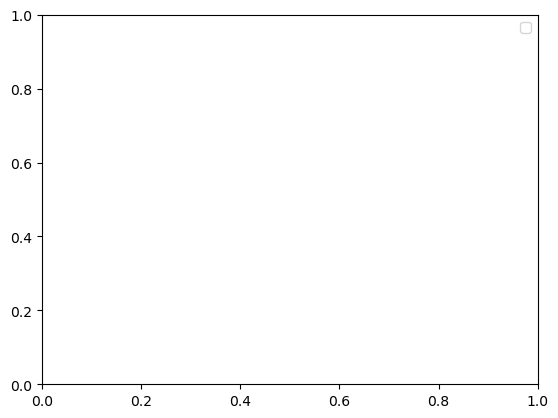

In [11]:
for t in range(0,t1,5):
#     plt.plot(0.01*(t+1)*O_matrix_std[0]*1/(0.005*(t+1)+(torch.tensor(K)-1)**2),label=t)
    plt.legend()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20772\2232260582.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+torch.exp(O_matrix_mean1[x]*torch.tensor(t))*torch.sin(torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20772\2232260582.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+(torch.exp(O_matrix_mean1[x]*torch.tensor(t)))*torch.sin(9*torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )
C:\Users\Administrator\AppData\L

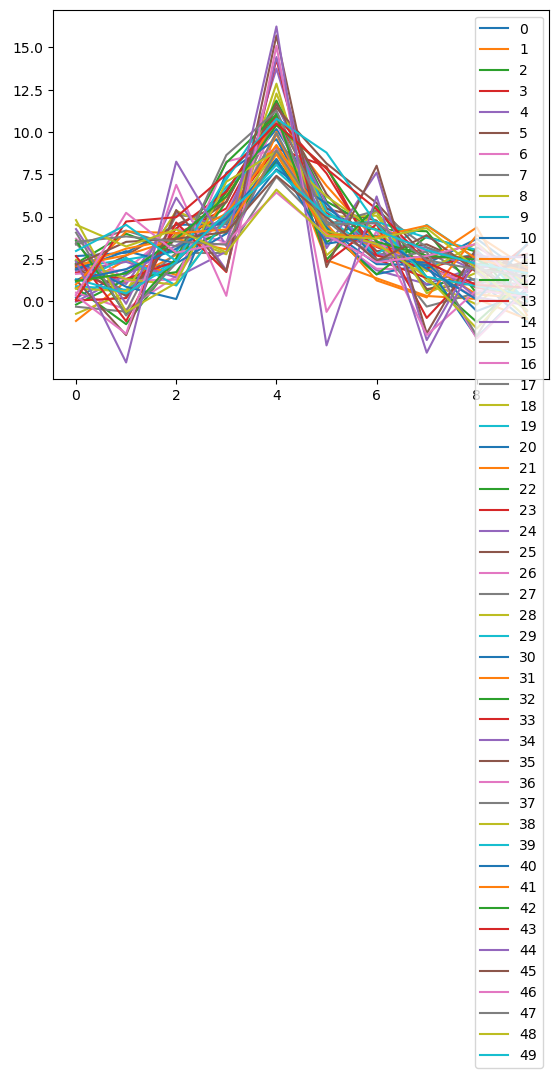

In [12]:
o,t,t1=simulate_HMM(T_matrix,O_matrix_mean,torch.tensor([1.0,0,0.0]),1000)

for i in range(0,t1):
    plt.plot(o[i].cpu().numpy(),label=i)
    plt.legend()

[]

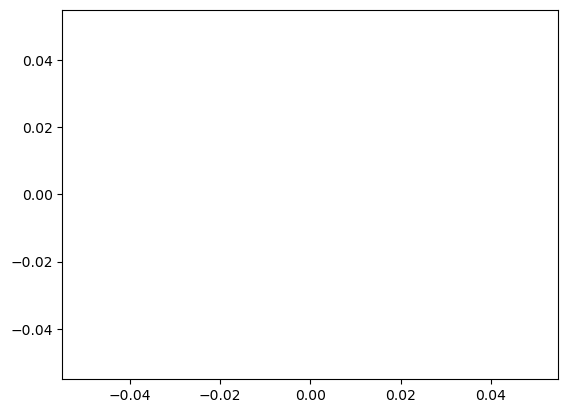

In [13]:

plt.plot()

In [14]:
# f=distribution_initalize(o[0])

def Expectation_diff(o_1):
    return (o_1[0])

def var_diff(o_1):
    return (o_1[1])

def abs_diff(e):
    k=0
    for i,e1 in enumerate(e):
        for j,e2 in enumerate(e):
            if j==i+1:
                k+=torch.sum(torch.abs(e2-e1))
    return k


In [15]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import time

start_time = time.time()  


for batch_size in [5]:
    trial =0 
    while trial < 5:
        t=50
        # batch_size=20
        try: 
            pred1=[]
            for i in range(0,batch_size):
                pred1.append(simulate_HMM(T_matrix,O_matrix_mean,s_0,t))
            import torch.optim as optim
            net = Net()
            net.to(device)
            optimizer = optim.Adam(net.parameters(), lr=.001)
            scheduler =lr_scheduler.LinearLR(optimizer,start_factor=1, end_factor=0.00001, total_iters=75)
            net.train()
    
            running_loss = 0.0
            o,t,t__1=simulate_HMM(T_matrix,O_matrix_mean,s_0,t)
            # dist=distribution_initalize(o)
            for epoch in range(50):  # loop over the dataset multiple times
    
    
    
    
                # zero the parameter gradients
                optimizer.zero_grad()
    
                # forward + backward + optimize
    
    
    
                loss=0.0
    
                for i in range(0,batch_size):
                    optimizer.zero_grad()
                    loss=0.0
    
            #         o,t=simulate_HMM(T_matrix,O_matrix_mean,s_0,t)
                    o,t,t_11=pred1[i]
                    pred=torch.zeros((1,t), dtype=torch.int32)
                    pred=o
            #         dist=distribution_update(dist,o)
                    loss-=net(net.s_0,t,pred)
    
                    l1_lambda = 0.001  # adjust the L1 regularization parameter as needed
                    l1_reg = torch.tensor(0.).to(device)
                    for param in net.parameters():
                        l1_reg += torch.norm(param, 1).to(device) 
                # #     print(dist)
                #     dist1=dist/torch.sum(dist)
                #     dist1=dist1.to(device)
                    f=0.0
                    for j in range(0,t):
                            o_1= net.emission((torch.tensor([1.0,j]).to(device)))
                            e1=Expectation_diff(o_1)
    
                            o_1=net.emission((torch.tensor([2.0,j]).to(device)))
                            e2=Expectation_diff(o_1)
    
                            o_1= net.emission((torch.tensor([3.0,j]).to(device)))
                            e3=Expectation_diff(o_1)
    
    
                            o_1= net.emission((torch.tensor([4.0,j]).to(device)))
                            e4=Expectation_diff(o_1)
                            f+=abs_diff([e1,e2,e3,e4])
                   
    
    
                    #+ l1_reg*l1_lambda
                #     print(loss)
                    loss=loss+ l1_reg*l1_lambda-0.01*f #+ 10*(torch.sum(t1*t2)/((torch.sum(t1**2)**0.5)*torch.sum(t2**2)**0.5) +torch.sum(t3*t2)/((torch.sum(t3**2)**0.5)*torch.sum(t2**2)**0.5)+torch.sum(t1*t3)/((torch.sum(t1**2)**0.5)*torch.sum(t3**2)**0.5) )
                    loss.backward()
                    optimizer.step()
                scheduler.step()
                    # print statistics
            # print(f'[{trial + 1}] loss: {loss/t}')
    
            # print('Finished Training')
    
            torch.save(pred1, "data_deep\ " + str(trial)+" _ "+str(batch_size)+ "_data.pt")
            torch.save(net.state_dict(),  "Model_deep\ " + str(trial)+" _ "+str(batch_size)+ "_model.pth")
            trial+=1
        except:
            print(f'[{trial + 1}] loss: {loss/t}')
            
            
            pass
end_time = time.time()  # Capture end time after the loop completes

print(f"Total execution time: {end_time - start_time} seconds")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20772\2232260582.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+torch.exp(O_matrix_mean1[x]*torch.tensor(t))*torch.sin(torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20772\2232260582.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  o.append(MultivariateNormal(0.1*5/(0.05+(torch.tensor(K)-1)**2)+(torch.exp(O_matrix_mean1[x]*torch.tensor(t)))*torch.sin(9*torch.pi*torch.tensor(K/2)/1),O_matrix_std[x]*torch.eye(length)).sample().to(device)   )
C:\Users\Administrator\AppData\L

Total execution time: 851.4477925300598 seconds
